In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [2]:
df_house = pd.read_csv('kc_house_data.csv')

In [4]:
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


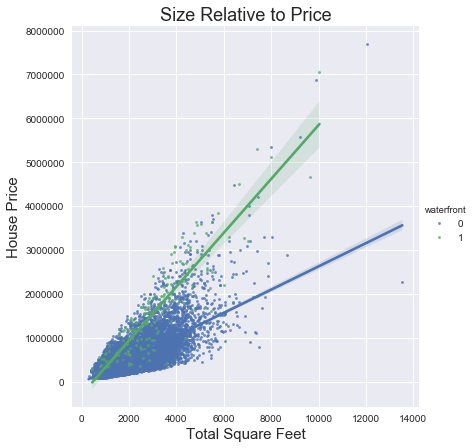

In [62]:
sns.lmplot(x='sqft_living', y='price', data=df_house, scatter_kws={'s':8}, hue='waterfront', height=6)

plt.title('Size Relative to Price', size=18)
plt.ylabel('House Price', size=15)
plt.xlabel('Total Square Feet', size=15)


plt.show()

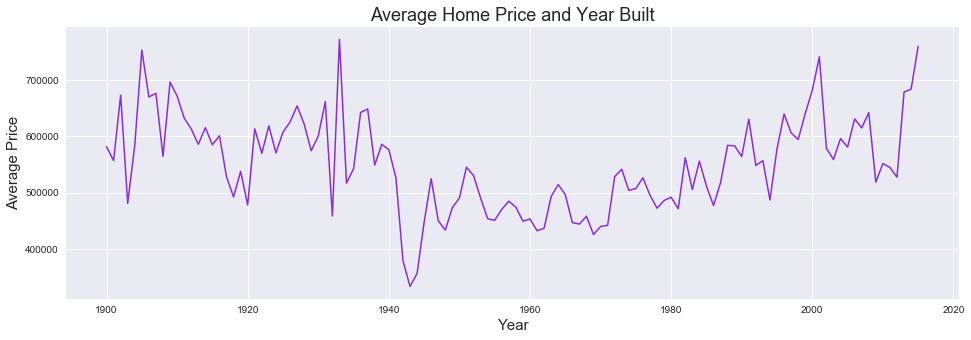

In [63]:
plt.figure(figsize=(16,5))

sns.lineplot(x='yr_built', y='price', data=df_house,linewidth=1.5, color='blueviolet', ci=None)

plt.title('Average Home Price and Year Built', size=18)
plt.ylabel('Average Price', size=15)
plt.xlabel('Year', size=15)

plt.show()

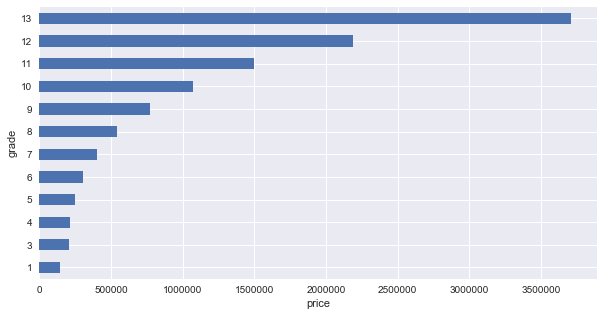

In [8]:
groups = df_house.groupby(['grade'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()

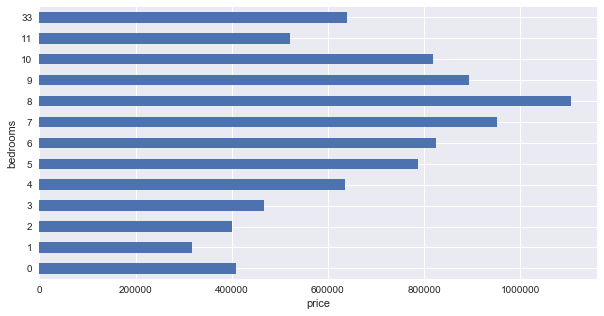

In [9]:
groups = df_house.groupby(['bedrooms'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()

In [10]:
neededCols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'yr_renovated', 'sqft_living15', 'sqft_lot15']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb412d9ee80>,
      dtype=object)

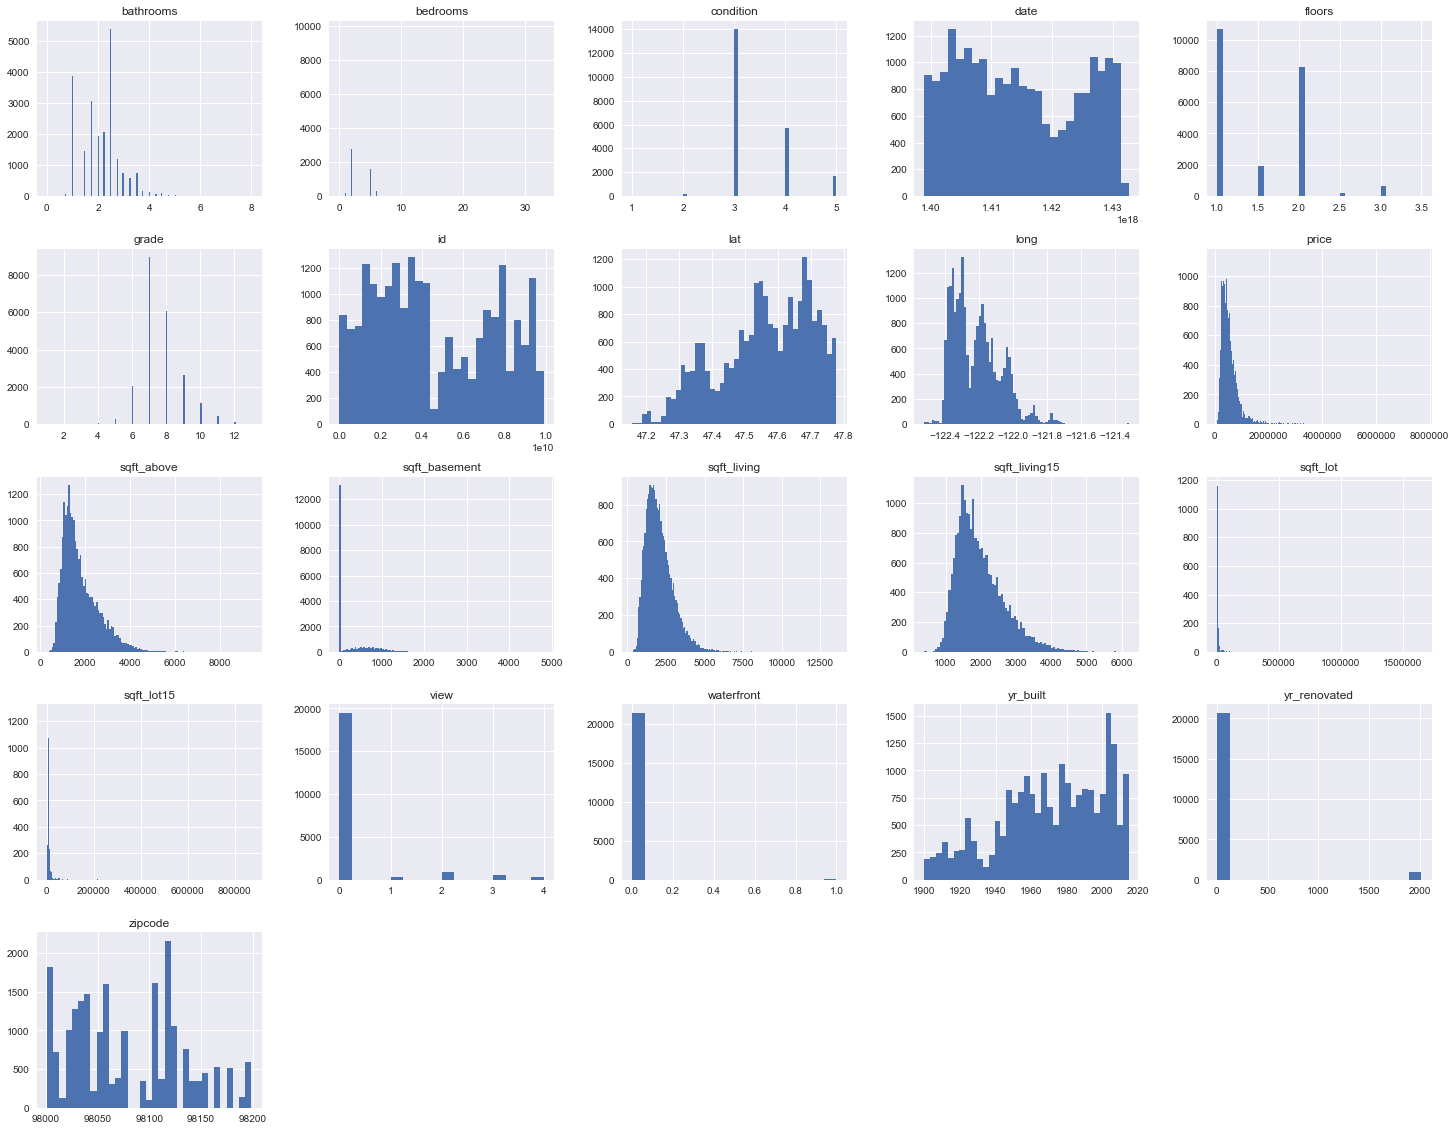

In [50]:
df_house.hist(figsize=(25,20), bins='auto')

In [11]:
regression_data = df_house[neededCols]

In [12]:
regression_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [15]:
X = regression_data.drop(['price'], axis=1)
y = regression_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lm = linear_model.LinearRegression() 

model = lm.fit(X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                        'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
                        'sqft_lot15']], y_train)

lm = sm.OLS(y_train, X_train)
model_1 = lm.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              9177.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:09:51   Log-Likelihood:                     -2.3746e+05
No. Observations:               17290   AIC:                                  4.750e+05
Df Residuals:                   17276   BIC:                                  4.751e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.968e+04   2326.284    -12.760      0.000   -3.42e+04   -2.51e+04
bathrooms     -7995.0735   3791.798     -2.109      0.035   -1.54e+04    -562.766
sqft_living     122.6055      2.821     43.458      0.000     117.076     128.135
sqft_lot         -0.0039      0.065     -0.060      0.952      -0.131       0.123
floors         4450.1758   4317.126      1.031      0.303   -4011.828    1.29e+04
waterfront     5.517e+05   2.19e+04     25.144      0.000    5.09e+05    5.95e+05
view           5.495e+04   2608.649     21.064      0.000    4.98e+04    6.01e+04
condition      5.825e+04   2686.665     21.680      0.000     5.3e+04    6.35e+04
grade          1.107e+05   2587.049     42.806      0.000    1.06e+05    1.16e+05
sqft_above       46.7345      2.718     17.196      0.000      41.408      52.062
sqft_basement    75.8710      3.201     23.701      0.000      69.596      82.146
yr_built       -409.1591      9.695    -42.203      0.000    -428.162    -390.156
yr_renovated     69.4426      4.307     16.123      0.000      61.000      77.885
sqft_living15    16.9298      4.158      4.072      0.000       8.780      25.079
sqft_lot15       -0.6247      0.092     -6.812      0.000      -0.804      -0.445
==============================================================================
Omnibus:                    13006.793   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           954079.011
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      38.892   Cond. No.                     4.05e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
#QQ plot
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

AttributeError: 'LinearRegression' object has no attribute 'resid'

In [25]:
print('Model Accuarcy is:', model.score(X_test,y_test))

Model Accuarcy is: 0.6541020314679737


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model.predict(X_train))))

Mean Square Root Error for train set: 212789.37425322627


In [32]:
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

MSE for test set: 228673.8237293402


In [20]:
cross_val_score(model, X_train, y_train, cv = 100, scoring = "r2").mean()

0.6404809370393123

In [40]:
#clean date
clean_date = df_house.date.apply(lambda x: x.split('T')[0])
clean_date

#clean date column
df_house['date'] = clean_date
df_house.head()

#format date column
df_house['date'] = pd.to_datetime(df_house['date'], format = '%Y/%m/%d')
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [41]:
df_house.date = df_house.date.astype(np.int64)

In [42]:
#remove outliers
z_scores = stats. zscore(df_house)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)
df_house_1 = df_house[filtered_entries]

In [43]:

df_house_1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,1403827200000000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
8,2414600126,1429056000000000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,2997800021,1424304000000000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21609,6600060120,1424649600000000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,1403481600000000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,1421366400000000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4156beba8>,
      dtype=object)

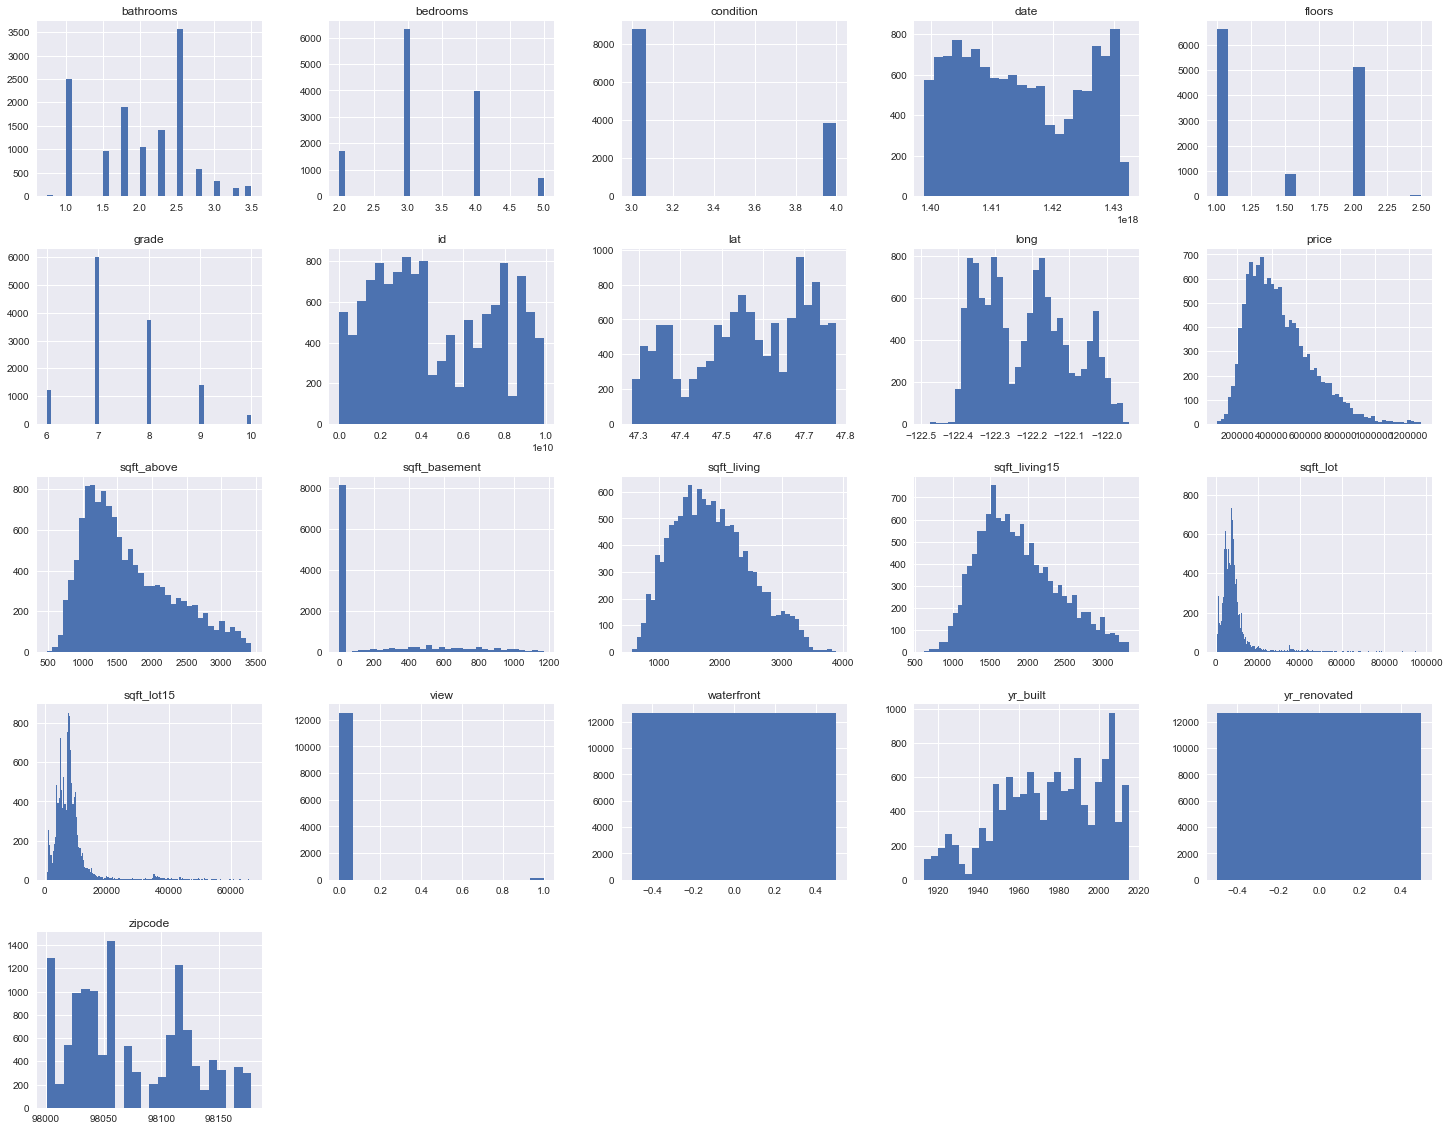

In [51]:
#histograms with Outliers Removed
df_house_1.hist(figsize=(25,20), bins='auto')

In [44]:
neededCols_1 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'yr_renovated', 'sqft_living15', 'sqft_lot15']

regression_data_1 = df_house_1[neededCols_1]

In [54]:
#regression model with outliers removed

X = regression_data_1.drop(['price'], axis=1)
y = regression_data_1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lm = linear_model.LinearRegression() 

model = lm.fit(X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                        'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
                        'sqft_lot15']], y_train)

lm = sm.OLS(y_train, X_train)
model_2 = lm.fit()
model_2.summary()




/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1362: RuntimeWarning:

invalid value encountered in true_divide



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              9141.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:39:59   Log-Likelihood:                     -1.3463e+05
No. Observations:               10141   AIC:                                  2.693e+05
Df Residuals:                   10129   BIC:                                  2.694e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -1.126e+04   2347.556     -4.797      0.000   -1.59e+04   -6659.946
bathrooms     -2.833e+04   3489.430     -8.118      0.000   -3.52e+04   -2.15e+04
sqft_living      69.0014      3.079     22.410      0.000      62.966      75.037
sqft_lot          0.0729      0.295      0.247      0.805      -0.505       0.651
floors         1.933e+04   4502.620      4.294      0.000    1.05e+04    2.82e+04
waterfront    -8.702e-11   7.72e-11     -1.127      0.260   -2.38e-10    6.44e-11
view           9.829e+04   1.26e+04      7.815      0.000    7.36e+04    1.23e+05
condition      4.273e+04   3148.792     13.569      0.000    3.66e+04    4.89e+04
grade          9.426e+04   2439.396     38.640      0.000    8.95e+04     9.9e+04
sqft_above        5.1750      2.854      1.813      0.070      -0.419      10.769
sqft_basement    63.8264      3.404     18.749      0.000      57.153      70.500
yr_built       -283.8741      9.933    -28.578      0.000    -303.345    -264.403
yr_renovated           0          0        nan        nan           0           0
sqft_living15    45.4846      4.296     10.589      0.000      37.065      53.905
sqft_lot15       -1.4183      0.367     -3.866      0.000      -2.137      -0.699
==============================================================================
Omnibus:                     1064.231   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1864.738
Skew:                           0.725   Prob(JB):                         0.00
Kurtosis:                       4.520   Cond. No.                     5.43e+34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-57. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
print('Model Accuarcy is:', model.score(X_test,y_test))
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print('Cross Validation Score:', cross_val_score(model, X_train, y_train, cv = 100, scoring = "r2").mean())

Model Accuarcy is: 0.5045392837101155
MSE for train set: 134346.4896760127
MSE for test set: 129440.00365858742
Cross Validation Score: 0.481053690026924
